<a href="https://colab.research.google.com/github/07423314796/Modelling/blob/main/Spotifymodelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:

data = pd.read_csv(r'/Most_Streamed_Spotify_Songs_2024[1].csv', encoding='latin-1')


In [ ]:
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [ ]:
missing_values = pd.DataFrame(data.isna().sum().sort_values(ascending = False)).reset_index().rename(columns = {'index':'Track' , 0:'missing_values'})
missing_values = missing_values.loc[missing_values['missing_values'] > 0]
missing_values

,Track,missing_values
0,TIDAL Popularity,4600
1,Soundcloud Streams,3333
2,SiriusXM Spins,2123
3,Pandora Track Stations,1268
4,TikTok Posts,1173
5,Pandora Streams,1106
6,Amazon Playlist Count,1055
7,YouTube Playlist Reach,1009
8,TikTok Views,981
9,TikTok Likes,980


In [ ]:
data.drop(['TIDAL Popularity','ISRC','All Time Rank','AirPlay Spins','SiriusXM Spins','Amazon Playlist Count','Pandora Streams',
           'Pandora Track Stations','Soundcloud Streams','Shazam Counts'],axis=1,inplace=True)

data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Explicit Track'],
      dtype='object')

In [ ]:
data.head()

,Track,Album Name,Artist,Release Date,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Deezer Playlist Count,Deezer Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,62.0,"17,598,718",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,67.0,"10,422,430",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,136.0,"36,321,847",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,264.0,"24,684,248",0
4,Houdini,Houdini,Eminem,5/31/2024,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,82.0,"17,660,624",1


In [ ]:
data.dropna(thresh=len(data.columns) - 5,inplace=True)
data.fillna(0,inplace=True)

In [ ]:
def modify_the_formula(data, columns):
    for col in columns:
        if data[col].dtype == object:
            data[col] = data[col].str.replace(',', '').apply(pd.to_numeric, errors='coerce')
    return data

In [ ]:
converted_columns = ['Spotify Streams','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes','TikTok Views',
                 'TikTok Posts','TikTok Likes','YouTube Playlist Reach','Apple Music Playlist Count','Deezer Playlist Count'
                  ,'Deezer Playlist Reach']
data = modify_the_formula(data,converted_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4075 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4075 non-null   object 
 1   Album Name                  4075 non-null   object 
 2   Artist                      4075 non-null   object 
 3   Release Date                4075 non-null   object 
 4   Track Score                 4075 non-null   float64
 5   Spotify Streams             4067 non-null   float64
 6   Spotify Playlist Count      4075 non-null   int64  
 7   Spotify Playlist Reach      4075 non-null   int64  
 8   Spotify Popularity          4075 non-null   float64
 9   YouTube Views               4025 non-null   float64
 10  YouTube Likes               4021 non-null   float64
 11  TikTok Posts                3382 non-null   float64
 12  TikTok Likes                3574 non-null   float64
 13  TikTok Views                3573 non-n

In [ ]:
# Check if 'Release_Date' or a similar column exists
print(data.columns)



Index(['Track', 'Album Name', 'Artist', 'Release Date', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Explicit Track'],
      dtype='object')


In [ ]:
data['Total_streams'] = data['Spotify Streams'] + data['YouTube Views'] + data['TikTok Views']
data['Playlists_Count'] = data['Deezer Playlist Count'] + data['Apple Music Playlist Count'] + data['Spotify Playlist Count']
data.head()

,Track,Album Name,Artist,Release Date,year,month,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Deezer Playlist Count,Deezer Playlist Reach,Explicit Track,Total_streams,Playlists_Count
0,1977,1291,1006,2024-04-26,2024,0,725.4,3.904709e+08,30716,196631588,...,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,62.0,17598718.0,0,5.807028e+09,30988.0
1,2303,1414,535,2024-05-04,2024,8,545.9,3.237039e+08,28113,174597137,...,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,67.0,10422430.0,1,6.483899e+08,28368.0
2,3825,948,70,2024-03-19,2024,7,538.4,6.013093e+08,54331,211607669,...,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,136.0,36321847.0,0,4.093029e+09,54657.0
3,1146,732,715,2023-01-12,2023,4,444.9,2.031281e+09,269802,136569078,...,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,264.0,24684248.0,0,1.773111e+10,270460.0
5,1937,1200,452,2023-11-10,2023,9,410.1,6.706654e+08,105892,175421034,...,4202367.0,2.149435e+08,2.938687e+09,2.867223e+09,138.0,86.0,17167254.0,1,3.740500e+09,106116.0


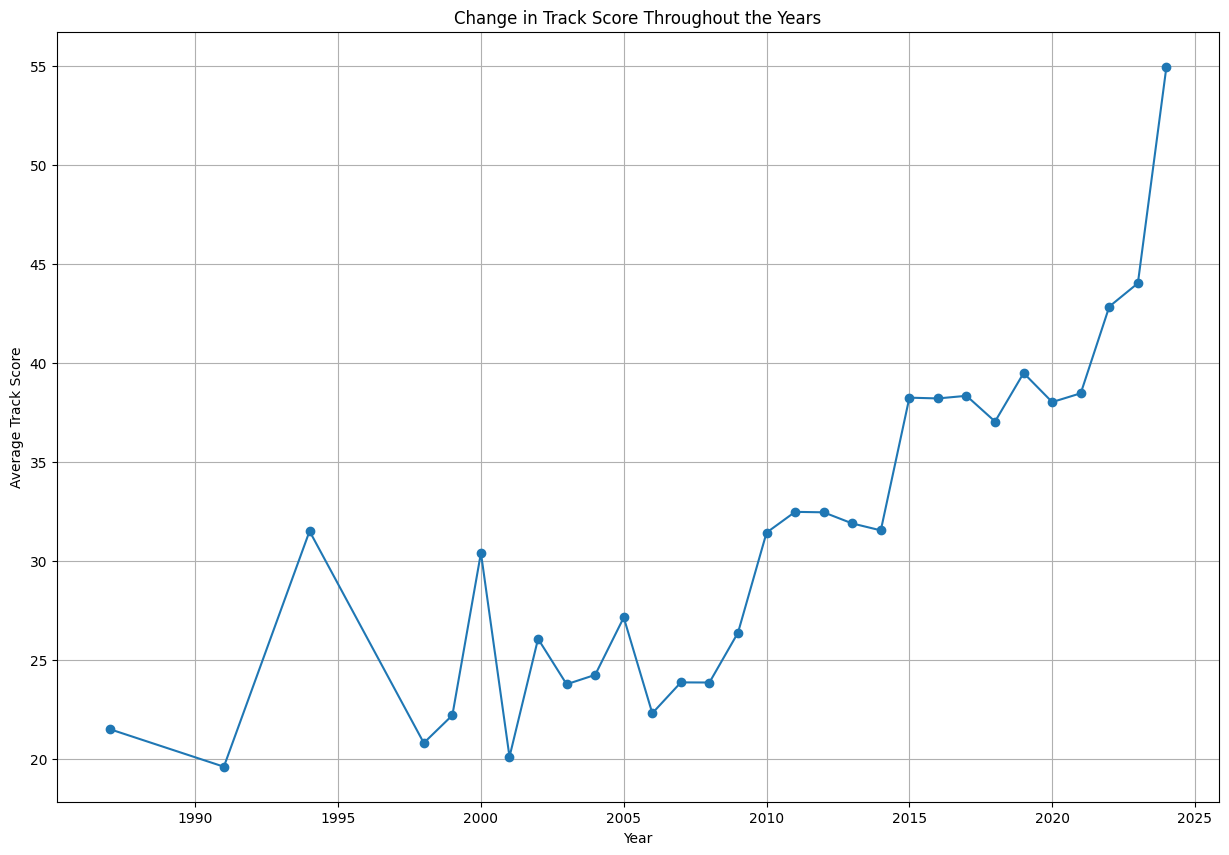

In [ ]:
import matplotlib.pyplot as plt

avg_track_score_per_year = data.groupby('year')['Track Score'].mean()

plt.figure(figsize=(15, 10))
avg_track_score_per_year.plot(kind='line', marker='o')
plt.title('Change in Track Score Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Average Track Score')
plt.grid(True)
plt.show()

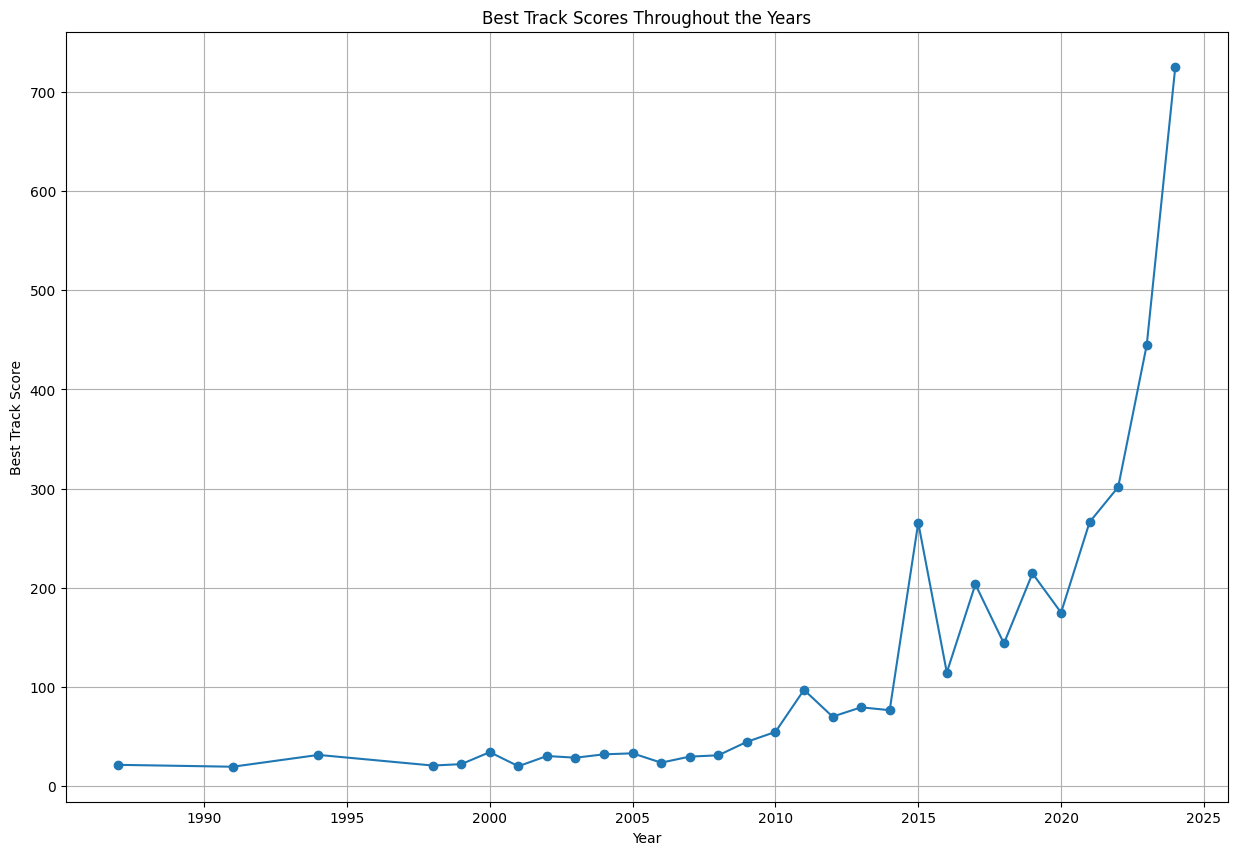

In [ ]:
best_track_score_per_year = data.groupby('year')['Track Score'].max()

plt.figure(figsize=(15, 10))
best_track_score_per_year.plot(kind='line', marker='o')
plt.title('Best Track Scores Throughout the Years')
plt.xlabel('Year')
plt.ylabel('Best Track Score')
plt.grid(True)
plt.show()

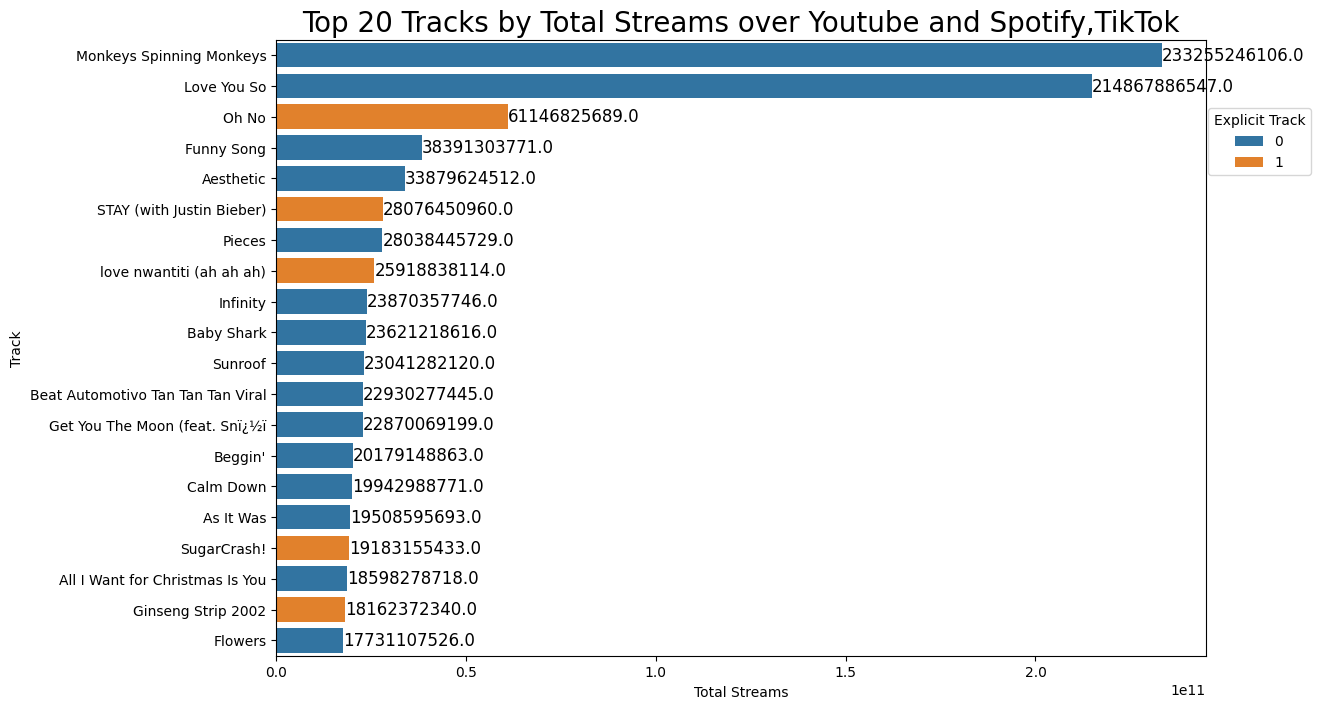

In [ ]:
import seaborn as sns
Track_total_streams = data.sort_values(by='Total_streams', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Total_streams', y='Track', data=Track_total_streams, hue='Explicit Track', dodge=False)
plt.xlabel('Total Streams')
plt.ylabel('Track')
plt.title('Top 20 Tracks by Total Streams over Youtube and Spotify,TikTok', fontsize=20)
plt.legend(title='Explicit Track', loc='upper right', bbox_to_anchor=(1.12,0.9))

for index, value in enumerate(Track_total_streams['Total_streams']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black')

plt.show()

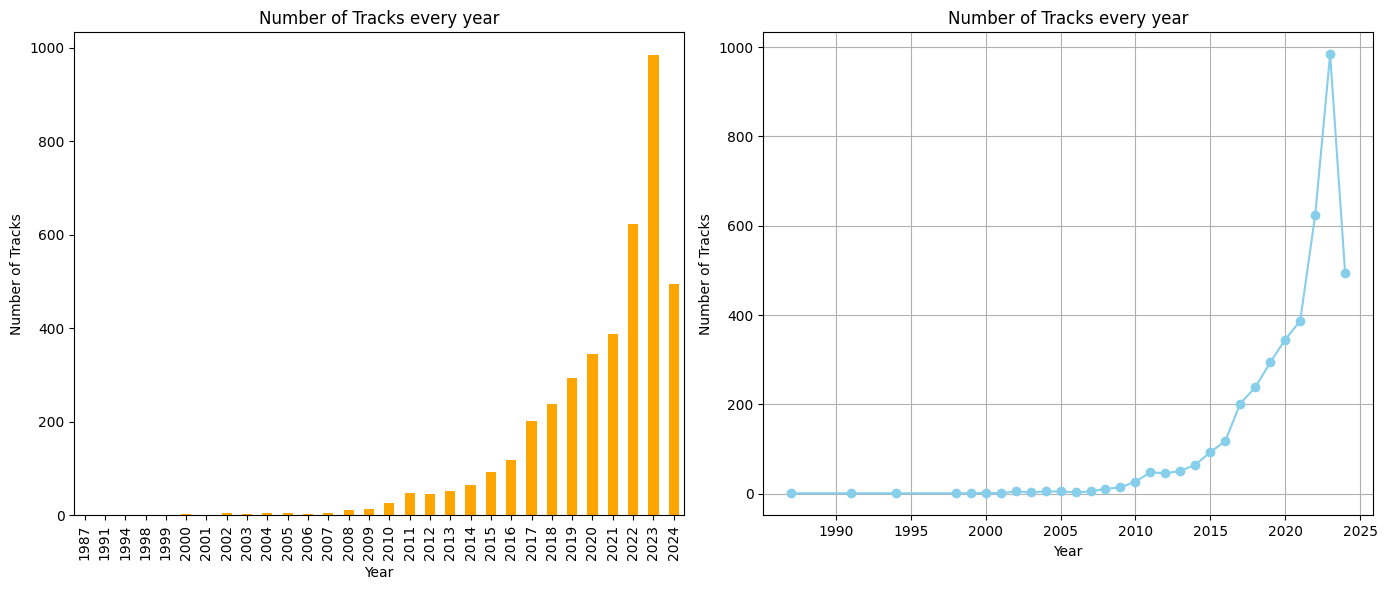

In [ ]:
tracks_per_year = data.groupby('year')['Track'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Bar Chart
tracks_per_year.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Number of Tracks every year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Tracks')

# Line Chart
tracks_per_year.plot(kind='line', ax=axes[1], color='skyblue', marker='o')
axes[1].set_title('Number of Tracks every year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Tracks')
axes[1].grid(True)

plt.tight_layout()
plt.show()

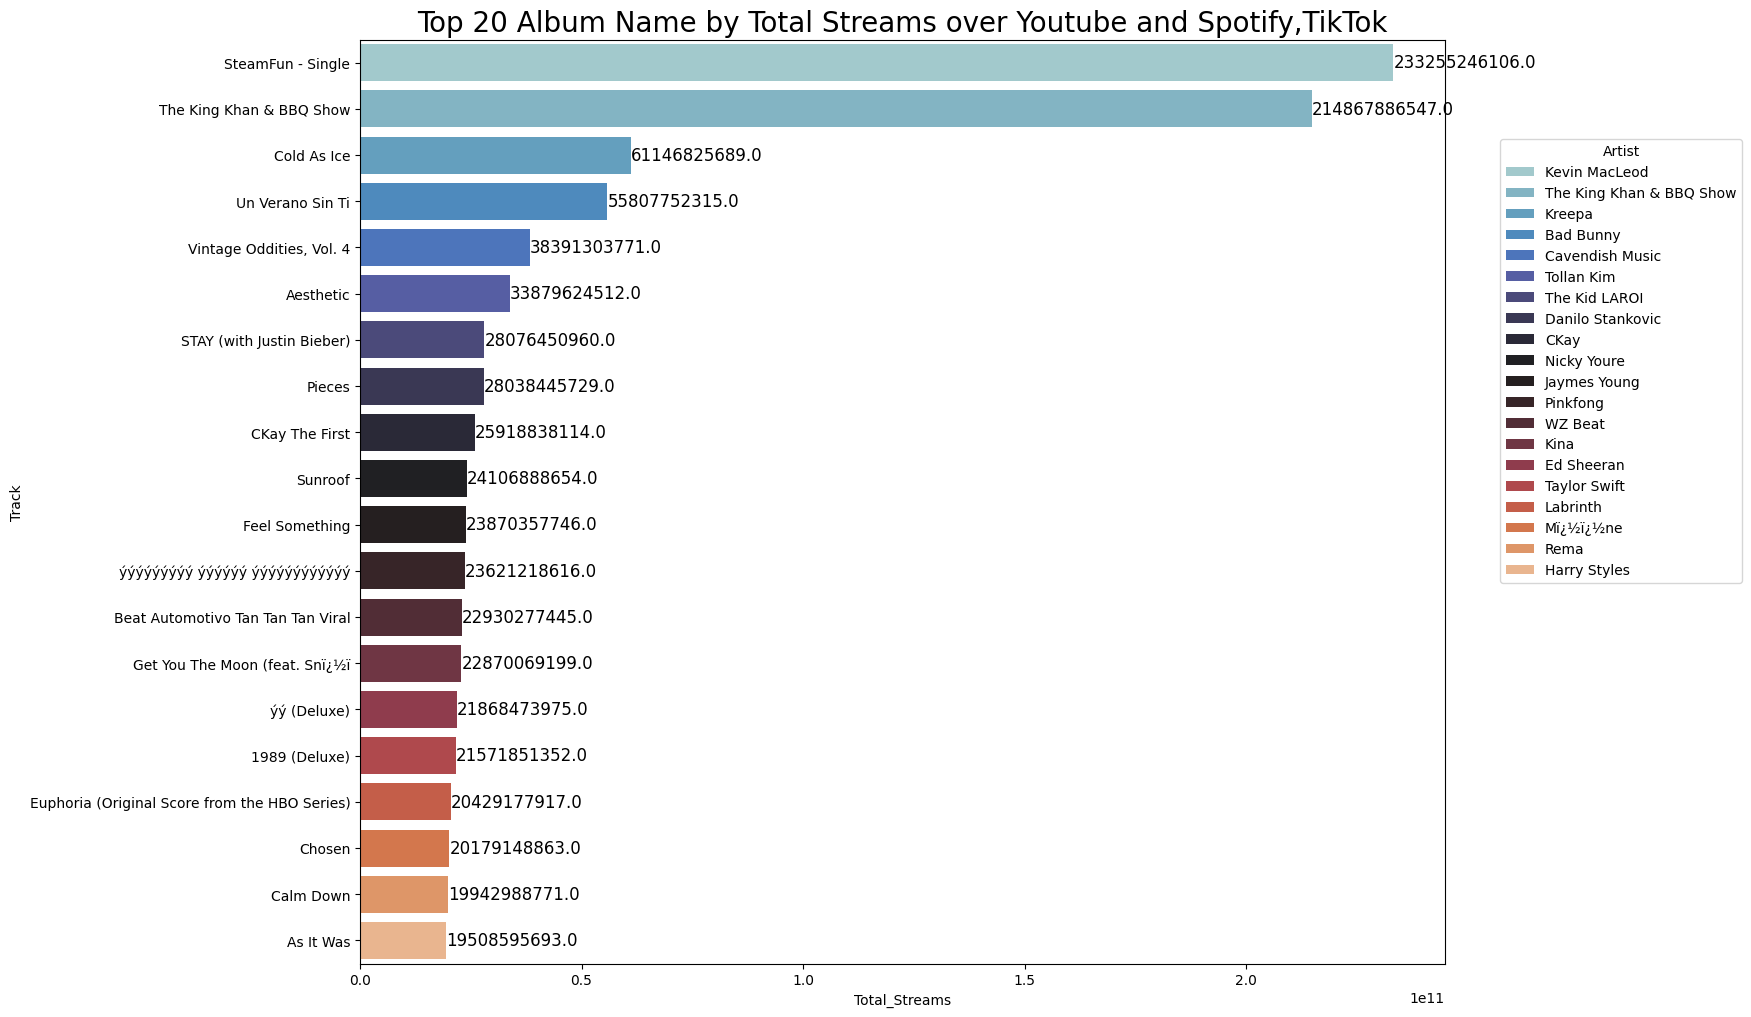

In [ ]:
Album_Streames = data.groupby(['Album Name','Artist'], as_index=False)['Total_streams'].sum()
Album_Streames = Album_Streames.sort_values(by='Total_streams', ascending=False).head(20)

plt.figure(figsize=(14,12))
sns.barplot(x='Total_streams', y='Album Name', data = Album_Streames, hue='Artist' ,dodge=False, palette='icefire')
plt.xlabel('Total_Streams')
plt.ylabel('Track')
plt.title('Top 20 Album Name by Total Streams over Youtube and Spotify,TikTok', fontsize=20)
plt.legend(title='Artist', loc='upper right', bbox_to_anchor=(1.28,0.9))

for index, value in enumerate(Album_Streames['Total_streams']):
    plt.text(value, index, f'{value}', va='center', ha='left', fontsize=12, color='black')

plt.show()

<Axes: xlabel='year', ylabel='TikTok Views'>

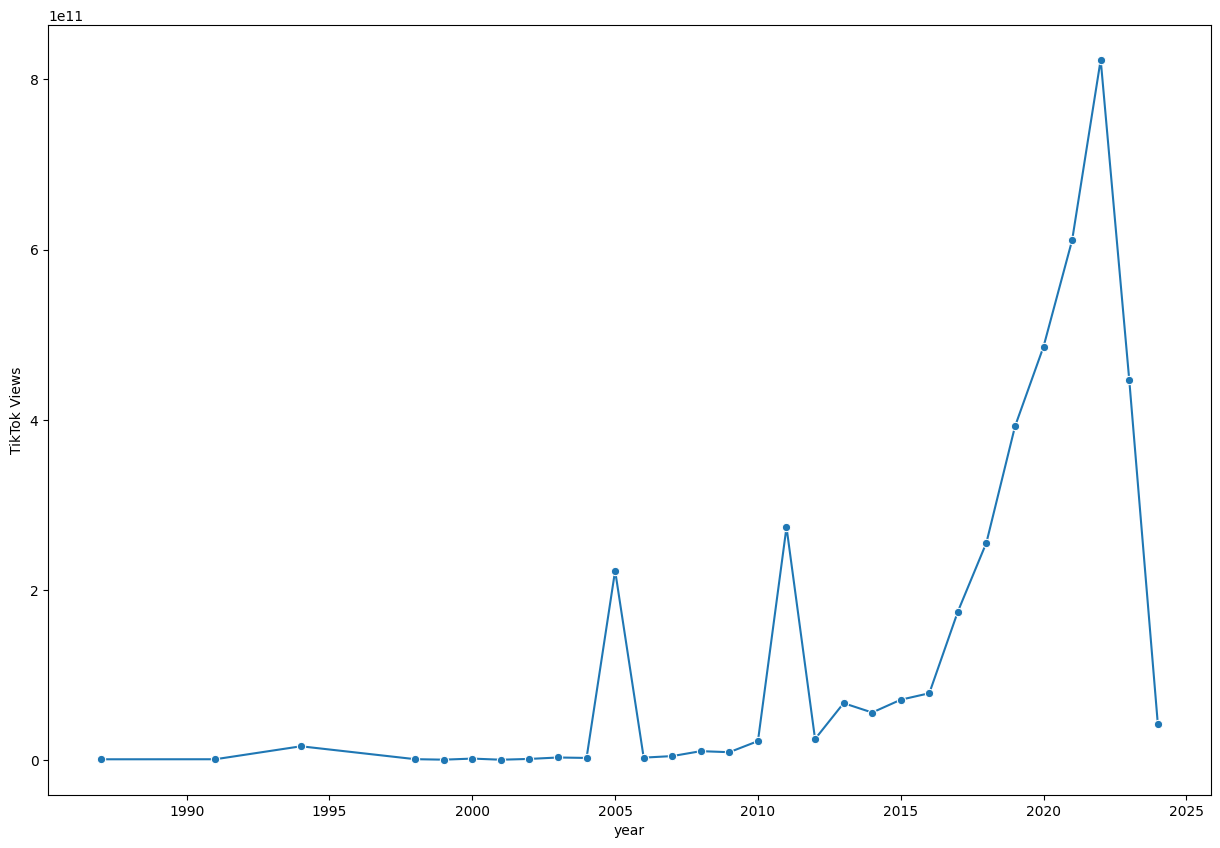

In [ ]:
plt.figure(figsize=(15, 10))
TikTok_Views_vs_Year=data.groupby('year')['TikTok Views'].sum().reset_index()
sns.lineplot(data=TikTok_Views_vs_Year,y='TikTok Views',x='year',marker="o")

In [ ]:
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'year', 'month',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count',
       'Deezer Playlist Count', 'Deezer Playlist Reach', 'Explicit Track',
       'Total_streams', 'Playlists_Count'],
      dtype='object')

In [ ]:
data.dtypes

Track                                  int64
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
year                                   int32
month                                 object
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count                 int64
Spotify Playlist Reach                 int64
Spotify Popularity                   float64
YouTube Views                        float64
YouTube Likes                        float64
TikTok Posts                         float64
TikTok Likes                         float64
TikTok Views                         float64
YouTube Playlist Reach               float64
Apple Music Playlist Count           float64
Deezer Playlist Count                float64
Deezer Playlist Reach                float64
Explicit Track                         int64
Total_streams                        float64
Playlists_

In [ ]:
print(data.columns)

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'year', 'month',
       'Track Score', 'Spotify Streams', 'Spotify Playlist Count',
       'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
       'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
       'YouTube Playlist Reach', 'Apple Music Playlist Count',
       'Deezer Playlist Count', 'Deezer Playlist Reach', 'Explicit Track',
       'Total_streams', 'Playlists_Count'],
      dtype='object')


In [ ]:
data.dtypes

Track                                  int64
Album Name                             int64
Artist                                 int64
Release Date                  datetime64[ns]
year                                   int32
month                                  int64
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count                 int64
Spotify Playlist Reach                 int64
Spotify Popularity                   float64
YouTube Views                        float64
YouTube Likes                        float64
TikTok Posts                         float64
TikTok Likes                         float64
TikTok Views                         float64
YouTube Playlist Reach               float64
Apple Music Playlist Count           float64
Deezer Playlist Count                float64
Deezer Playlist Reach                float64
Explicit Track                         int64
Total_streams                        float64
Playlists_

In [ ]:
numerical_data = data.select_dtypes(exclude=['object'])


In [ ]:
numerical_data.head()

,Track,Album Name,Artist,Release Date,year,month,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,Deezer Playlist Count,Deezer Playlist Reach,Explicit Track,Total_streams,Playlists_Count
0,1977,1291,1006,2024-04-26,2024,0,725.4,3.904709e+08,30716,196631588,...,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,210.0,62.0,17598718.0,0,5.807028e+09,30988.0
1,2303,1414,535,2024-05-04,2024,8,545.9,3.237039e+08,28113,174597137,...,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,188.0,67.0,10422430.0,1,6.483899e+08,28368.0
2,3825,948,70,2024-03-19,2024,7,538.4,6.013093e+08,54331,211607669,...,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,190.0,136.0,36321847.0,0,4.093029e+09,54657.0
3,1146,732,715,2023-01-12,2023,4,444.9,2.031281e+09,269802,136569078,...,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,394.0,264.0,24684248.0,0,1.773111e+10,270460.0
5,1937,1200,452,2023-11-10,2023,9,410.1,6.706654e+08,105892,175421034,...,4202367.0,2.149435e+08,2.938687e+09,2.867223e+09,138.0,86.0,17167254.0,1,3.740500e+09,106116.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score


# Select features and target variable
features = ['year', 'month', 'Track Score', 'Spotify Playlist Count',
            'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
            'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
            'YouTube Playlist Reach', 'Apple Music Playlist Count',
            'Deezer Playlist Count', 'Deezer Playlist Reach', 'Explicit Track',
            'Total_streams', 'Playlists_Count']
target = 'Spotify Streams'

# Prepare data
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define kernel for Gaussian process with expanded range
kernel = C(1.0, (1e-3, 1e5)) * RBF(10, (1e-2, 1e4))

# Create Gaussian process regressor
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, random_state=42)

# Train the model
gp.fit(X_train, y_train)

# Make predictions
y_pred, sigma = gp.predict(X_test, return_std=True)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction
# new_data = [[...]]  # Replace with values for a new song, using only the selected numerical features
# new_data_scaled = scaler.transform(new_data)
# prediction, std = gp.predict(new_data_scaled, return_std=True)
# print(f"Predicted Spotify Streams: {prediction[0]}")


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.



Mean Squared Error: 2.0875373054664973e+17
R-squared: 0.18786405223516733


In [ ]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2.0875373054664973e+17
Root Mean Squared Error: 456895754.5728016
R-squared: 0.18786405223516733


In [ ]:


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Define threshold for hit/not hit classification
threshold = data['Spotify Streams'].median()

# Create a new target variable for classification
data['hit'] = (data['Spotify Streams'] > threshold).astype(int)

# Select features and target variable
features = ['year', 'month', 'Track Score', 'Spotify Playlist Count',
            'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views',
            'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
            'YouTube Playlist Reach', 'Apple Music Playlist Count',
            'Deezer Playlist Count', 'Deezer Playlist Reach', 'Explicit Track',
            'Total_streams', 'Playlists_Count']
target = 'hit'

# Prepare data
X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create Gaussian process classifier
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the model
gpc.fit(X_train, y_train)

# Make predictions
y_pred = gpc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning:

The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.



Accuracy: 0.9685185185185186
Precision: 0.9783393501805054
Recall: 0.9609929078014184
F1-score: 0.9695885509838998
